# Bankruptcy Prevention

### Objective : 

Develop a machine learning model which can classify that a business goes bankrupt or not, using the different features provided.

### Dataset Details: 

industrial_risk: 0=low risk, 0.5=medium risk, 1=high risk.

management_risk: 0=low risk, 0.5=medium risk, 1=high risk.

financial flexibility: 0=low flexibility, 0.5=medium flexibility, 1=high flexibility.

credibility: 0=low credibility, 0.5=medium credibility, 1=high credibility.

competitiveness: 0=low competitiveness, 0.5=medium competitiveness, 1=high competitiveness.

operating_risk: 0=low risk, 0.5=medium risk, 1=high risk.

class: bankruptcy, non-bankruptcy (target variable).

## Preprocessing:

In [1]:
#Importing necessary libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Loading Dataset:

In [2]:
#Loading csv file in pandas dataframe:
df = pd.read_csv('bankruptcy-prevention.csv',sep=';')
df

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


### EDA:

In [3]:
#Summary Statistics of data:
df.describe()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.518000,0.614000,0.376000,0.470000,0.476000,0.570000
std,0.411526,0.410705,0.401583,0.415682,0.440682,0.434575
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
df.describe(include='all')

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250
unique,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,non-bankruptcy
freq,NaN,NaN,NaN,NaN,NaN,NaN,143
mean,0.518000,0.614000,0.376000,0.470000,0.476000,0.570000,NaN
std,0.411526,0.410705,0.401583,0.415682,0.440682,0.434575,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,NaN
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,NaN
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000,NaN


In [5]:
#Checking for missing values:
df.isna().sum()

industrial_risk           0
 management_risk          0
 financial_flexibility    0
 credibility              0
 competitiveness          0
 operating_risk           0
 class                    0
dtype: int64

In [6]:
#Checking for duplicates in the data:
df.duplicated().sum()

147

In [7]:
df[df.duplicated()]

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
11,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
13,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
15,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
16,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
18,0.5,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


In [8]:
#Checking the data types:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   industrial_risk         250 non-null    float64
 1    management_risk        250 non-null    float64
 2    financial_flexibility  250 non-null    float64
 3    credibility            250 non-null    float64
 4    competitiveness        250 non-null    float64
 5    operating_risk         250 non-null    float64
 6    class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


In [9]:
#Renaming colums:
new_column_names = ['industrial_risk', 'management_risk', 'financial_flexibility','credibility','competitiveness','operating_risk','class']
df.columns = new_column_names

In [10]:
#Checking for class imbalance:
df['class'].value_counts()

class
non-bankruptcy    143
bankruptcy        107
Name: count, dtype: int64

Observation:

There are more non-bankruptcy cases than bankruptcy cases, which can make the model less sensitive to the bankruptcy cases.

### Data Visualization:

Comparison of each feature between bankruptcy and non-bankruptcy class:

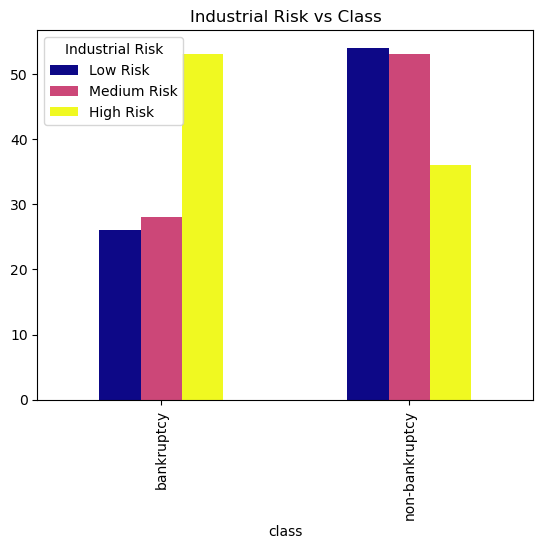

In [11]:
risk_labels = {0: 'Low Risk', 0.5: 'Medium Risk', 1: 'High Risk'}
pd.crosstab(df['class'],df['industrial_risk']).plot(kind='bar',colormap='plasma')
plt.title("Industrial Risk vs Class")
legend = plt.legend()
legend.set_title('Industrial Risk')
for t, l in zip(legend.texts, risk_labels.values()): 
    t.set_text(l)

Observation:

The graph suggests that companies with high industrial risk are more likely to face bankruptcy.

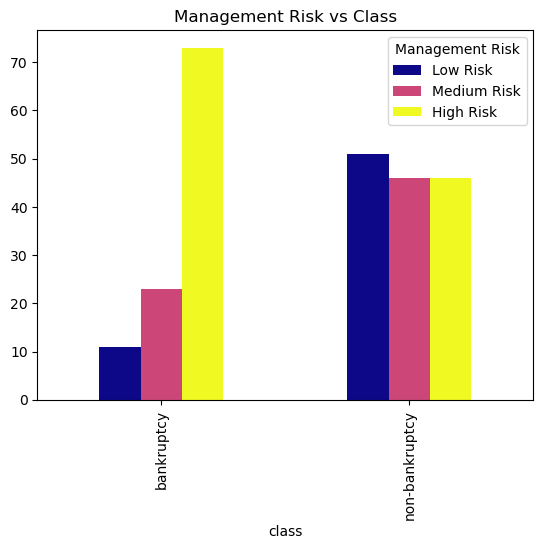

In [12]:
risk_labels = {0: 'Low Risk', 0.5: 'Medium Risk', 1: 'High Risk'}
pd.crosstab(df['class'],df['management_risk']).plot(kind='bar',colormap='plasma')
plt.title("Management Risk vs Class")
legend = plt.legend()
legend.set_title('Management Risk')
for t, l in zip(legend.texts, risk_labels.values()): 
    t.set_text(l)

Observation:

The graph suggests that companies with high management risk are more likely to face bankruptcy.

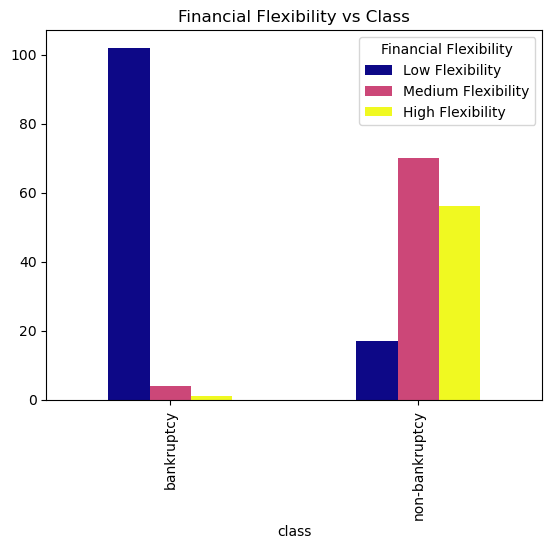

In [13]:
risk_labels = {0: 'Low Flexibility', 0.5: 'Medium Flexibility', 1: 'High Flexibility'}
pd.crosstab(df['class'],df['financial_flexibility']).plot(kind='bar',colormap='plasma')
plt.title("Financial Flexibility vs Class")
legend = plt.legend()
legend.set_title('Financial Flexibility')
for t, l in zip(legend.texts, risk_labels.values()): 
    t.set_text(l)

Observation:

The graph suggests that companies with low financial flexibility are more likely to face bankruptcy

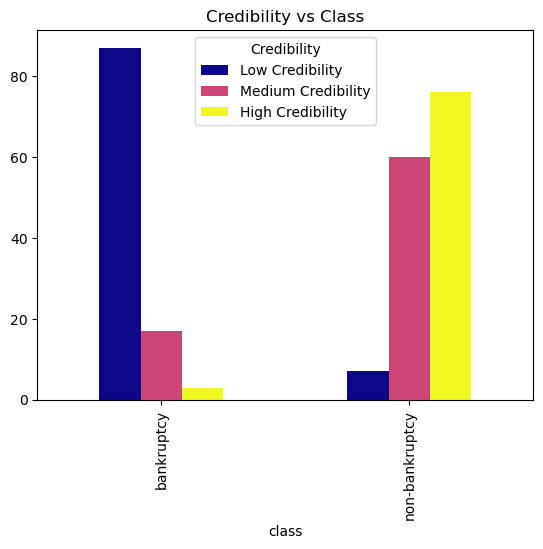

In [14]:
risk_labels = {0: 'Low Credibility', 0.5: 'Medium Credibility', 1: 'High Credibility'}
pd.crosstab(df['class'],df['credibility']).plot(kind='bar',colormap='plasma')
plt.title("Credibility vs Class")
legend = plt.legend()
legend.set_title('Credibility')
for t, l in zip(legend.texts, risk_labels.values()): 
    t.set_text(l)

Observation:

The graph suggests that companies with low credibility are more likely to face bankruptcy.

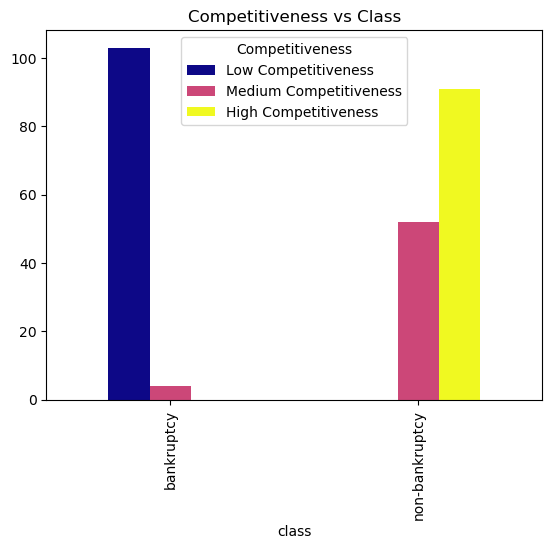

In [15]:
risk_labels = {0: 'Low Competitiveness', 0.5: 'Medium Competitiveness', 1: 'High Competitiveness'}
pd.crosstab(df['class'],df['competitiveness']).plot(kind='bar',colormap='plasma')
plt.title("Competitiveness vs Class")
legend = plt.legend()
legend.set_title('Competitiveness')
for t, l in zip(legend.texts, risk_labels.values()): 
    t.set_text(l)

Observation:

The graph suggests that companies with low competitiveness are more likely to face bankruptcy.

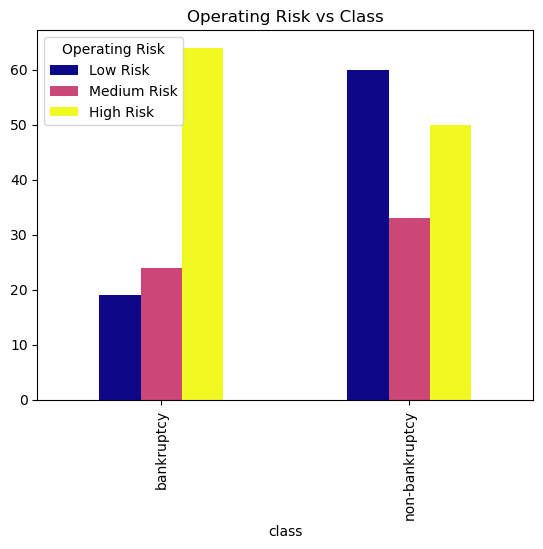

In [16]:
risk_labels = {0: 'Low Risk', 0.5: 'Medium Risk', 1: 'High Risk'}
pd.crosstab(df['class'],df['operating_risk']).plot(kind='bar',colormap='plasma')
plt.title("Operating Risk vs Class")
legend = plt.legend()
legend.set_title('Operating Risk')
for t, l in zip(legend.texts, risk_labels.values()): 
    t.set_text(l)

Observation:

The graph suggests that companies with high operating risk are more likely to face bankruptcy.

## Feature Selection:

In the case of classification problems where input variables are also categorical, we can use statistical tests to determine whether the output variable is dependent or independent of the input variables. If independent, then the input variable is a candidate for a feature that may be irrelevant to the problem and removed from the dataset.

The Pearson’s chi-squared statistical hypothesis is a test for independence between categorical variables.

Ho = Independence

H1 = Dependence

In [19]:
from scipy.stats import chi2_contingency


for col in df.columns[:-1]:
    
    new_df = pd.crosstab(df['class'],df[col])
    chi2_stat, p_val, dof, expected = chi2_contingency(new_df)
    
    if p_val<=0.2:
        print("p_value for",col,"at α = 0.05 is",p_val,"\n")

p_value for industrial_risk at α = 0.05 is 0.00035105555200737033 

p_value for management_risk at α = 0.05 is 2.3366640799655196e-08 

p_value for financial_flexibility at α = 0.05 is 7.334022479874038e-38 

p_value for credibility at α = 0.05 is 5.877823993544079e-35 

p_value for competitiveness at α = 0.05 is 1.017869598909574e-51 

p_value for operating_risk at α = 0.05 is 5.429569801610118e-05 



The p_value observed for all the features are less than significance level. 
Therefore, we can reject null hypothesis and accept alternate hypothesis for all of the features.

So, we can conclude that there is dependance between the features and target feature.

In [18]:
df.to_excel("new_data.xlsx", sheet_name="Sheet1") #Converting df into excel file